In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
# Import normalize
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
from sklearn import datasets

In [43]:
eurovisionDf = pd.read_csv("eurovision-2016.csv")
eurovisionDf.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [44]:
eurovisionDf.fillna(0, inplace=True)
eurovisionDf.tail()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
1061,United Kingdom,Ukraine,11,1,1,1,5,2,6,10.0,5.0
1062,United Kingdom,Malta,18,13,8,17,4,12,15,0.0,0.0
1063,United Kingdom,Georgia,2,2,3,2,1,1,19,12.0,0.0
1064,United Kingdom,Austria,23,15,12,18,13,17,13,0.0,0.0
1065,United Kingdom,Armenia,15,22,7,24,18,20,18,0.0,0.0


In [45]:
eurovisionPivot = pd.pivot_table(eurovisionDf, values='Jury Points', index='From country', columns='To country', aggfunc=np.sum).fillna(0)
eurovisionPivot

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,12.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,10.0,...,0.0,2.0,0.0,7.0,0.0,6.0,0.0,0.0,0.0,5.0
Armenia,0.0,5.0,0.0,0.0,4.0,7.0,0.0,6.0,1.0,12.0,...,0.0,8.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,12.0,8.0,1.0,0.0,0.0,6.0,...,7.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,2.0,4.0
Austria,2.0,12.0,0.0,0.0,5.0,0.0,6.0,0.0,4.0,7.0,...,1.0,10.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.0
Azerbaijan,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,5.0,6.0,2.0,12.0,0.0,1.0,0.0,0.0,10.0,0.0
Belarus,3.0,6.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,...,10.0,5.0,0.0,12.0,0.0,0.0,8.0,0.0,7.0,0.0
Belgium,0.0,12.0,5.0,0.0,0.0,6.0,0.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0
Bosnia & Herzegovina,2.0,10.0,0.0,1.0,0.0,3.0,4.0,0.0,6.0,7.0,...,0.0,0.0,0.0,5.0,8.0,0.0,0.0,0.0,12.0,0.0
Bulgaria,12.0,8.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,1.0,7.0,0.0,6.0,5.0,4.0,0.0,2.0,0.0,0.0


In [46]:
country_names = eurovisionPivot.index.values.astype(str)
country_names

array(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belarus', 'Belgium', 'Bosnia & Herzegovina', 'Bulgaria',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'F.Y.R. Macedonia', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenegro', 'Norway',
       'Poland', 'Russia', 'San Marino', 'Serbia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'The Netherlands', 'Ukraine',
       'United Kingdom'], dtype='<U20')

In [47]:
samples = eurovisionPivot.values.astype(int)
samples.shape

(42, 26)

In [48]:
mergings = linkage(samples, method='complete')
mergings

array([[ 5.        , 25.        ,  9.69535971,  2.        ],
       [14.        , 35.        , 10.58300524,  2.        ],
       [26.        , 31.        , 11.04536102,  2.        ],
       [10.        , 19.        , 12.16552506,  2.        ],
       [12.        , 38.        , 12.9614814 ,  2.        ],
       [17.        , 23.        , 13.11487705,  2.        ],
       [29.        , 36.        , 13.19090596,  2.        ],
       [16.        , 30.        , 14.2126704 ,  2.        ],
       [28.        , 42.        , 14.28285686,  3.        ],
       [20.        , 37.        , 15.03329638,  2.        ],
       [ 0.        ,  6.        , 15.09966887,  2.        ],
       [ 2.        , 22.        , 15.09966887,  2.        ],
       [41.        , 44.        , 15.3622915 ,  3.        ],
       [ 4.        , 34.        , 15.55634919,  2.        ],
       [13.        , 15.        , 15.68438714,  2.        ],
       [ 3.        , 21.        , 15.8113883 ,  2.        ],
       [45.        , 48.

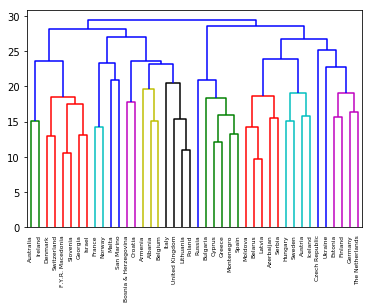

In [49]:
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [52]:
labels = fcluster(mergings, 15, criterion='distance')
labels

array([11, 13,  1, 26, 22, 21, 12,  9, 19, 10, 17, 33,  3, 28,  4, 29,  6,
        5, 30, 17, 24, 27,  2,  5, 16, 21, 14,  7, 21, 18,  6, 14, 20,  8,
       23,  4, 18, 25,  3, 31, 32, 15], dtype=int32)

In [54]:
pairs = pd.DataFrame({'labels': labels, 'countries': country_names})
print(pairs.sort_values('labels'))

    labels             countries
2        1             Australia
22       2               Ireland
38       3           Switzerland
12       3               Denmark
35       4              Slovenia
14       4      F.Y.R. Macedonia
23       5                Israel
17       5               Georgia
16       6                France
30       6                Norway
27       7                 Malta
33       8            San Marino
7        9  Bosnia & Herzegovina
9       10               Croatia
0       11               Albania
6       12               Belgium
1       13               Armenia
31      14                Poland
26      14             Lithuania
41      15        United Kingdom
24      16                 Italy
10      17                Cyprus
19      17                Greece
36      18                 Spain
29      18            Montenegro
8       19              Bulgaria
32      20                Russia
25      21                Latvia
5       21               Belarus
28      21

### Linkage methods
complete linkage = the distance between clusters is the distance between the furthest points of the clusters<br>
single linkage = the distance between clusters is the distance between the closest points of the clusters
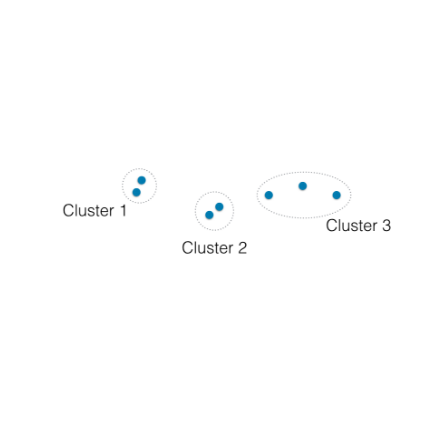
In single linkage, cluster 3 is the closest to cluster 2<br>
In complete linkage, cluster 1 is the closest to cluster 2

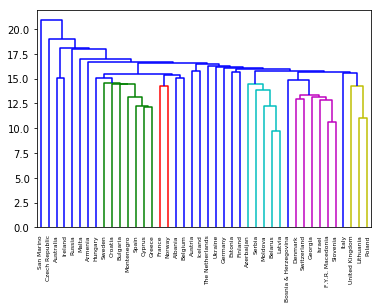

In [55]:
# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6
)
plt.show()

In [56]:
samples = pd.read_csv("seeds.csv", header=None).values[:, 0:7]
samples

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [57]:
wheats = np.array(['Kama', 'Rosa', 'Canadian'])
targets = pd.read_csv("seeds.csv", header=None).values[:, 7].astype(int) - 1
varieties = wheats[targets]
varieties

array(['Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
      

In [58]:
X_train, X_test, y_train, y_test = train_test_split(samples, varieties, test_size = 0.75, random_state=42, stratify=varieties)

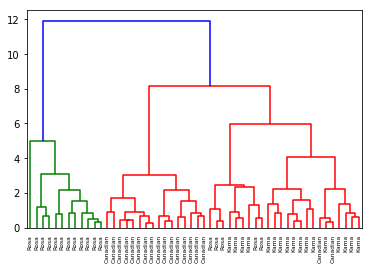

In [59]:
# Calculate the linkage: mergings
mergings = linkage(X_train, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=y_train,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [61]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y_train})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian  Kama  Rosa
labels                         
1                 0     0    12
2                16     0     0
3                 2    17     5


In [60]:
movements = pd.read_csv("company-stock-movements-2010-2015-incl.csv").values[:, 1:964].astype(float)
movements.shape

(60, 963)

In [41]:
companies = pd.read_csv("company-stock-movements-2010-2015-incl.csv").values[:, 0]
companies.shape

(60,)

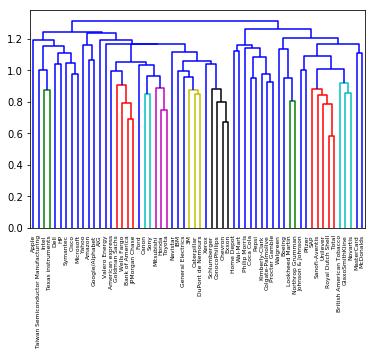

In [42]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6
)
plt.show()

In [65]:
iris = datasets.load_iris()

In [82]:
model = TSNE(learning_rate=100) # try values between 50 and 200

In [83]:
transformed = model.fit_transform(iris.data)

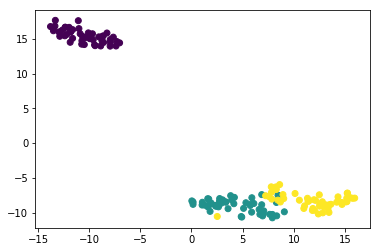

In [84]:
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=iris.target)
plt.show()

In [85]:
samples = pd.read_csv("seeds.csv", header=None).values[:, 0:7]
samples.shape

(210, 7)

In [86]:
variety_numbers = pd.read_csv("seeds.csv", header=None).values[:, 7].astype(int)
variety_numbers

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

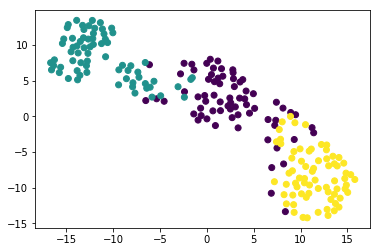

In [87]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

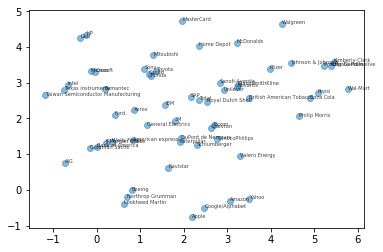

In [89]:
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()